In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
class MLP(nn.Module):
    def __init__(self, layer_dims):
        super().__init__()
        self.layyers = nn.ModuleList()
        for i in range(len(layer_dims) - 1):
            self.layyers.append(nn.Linear(layer_dims[i], layer_dims[i + 1]))
        self.activation = nn.Tanh()

    def forward(self, x):
        for layer in self.layyers[:-1]:
            x = self.activation(layer(x))
        x = self.layyers[-1](x)
        return x
    

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

x_data = torch.linspace(-1, 1, 100).view(-1, 1).to(device)
y_ideal = torch.sin(torch.pi * x_data)
# torch.randn_like(y_ideal) 会生成一个形状与 y_ideal 相同、服从标准正态分布的张量
noise = torch.randn_like(y_ideal) * 0.1 # 添加噪声，标准差为 0.1
# 3. 将理想值和噪声相加，得到最终的 y_data
y_data = (y_ideal + noise).to(device)


Using device: cuda


In [17]:
layer_dims = [1, 64, 1]
model = MLP(layer_dims).to(device)
# 定义损失函数 (MSE)
loss_function = nn.MSELoss()
# 定义优化器 (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
# --- 4. 训练循环 ---
epochs = 3000

for epoch in range(epochs):
    # 前向传播：获取模型预测值
    y_pred = model(x_data)

    # 计算损失
    loss = loss_function(y_pred, y_data)
    
    # 清零梯度
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()
    # 每100个epoch打印一次损失
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}") 

Epoch [100/3000], Loss: 0.2043
Epoch [200/3000], Loss: 0.1970
Epoch [300/3000], Loss: 0.1847
Epoch [400/3000], Loss: 0.1640
Epoch [500/3000], Loss: 0.1317
Epoch [600/3000], Loss: 0.0894
Epoch [700/3000], Loss: 0.0489
Epoch [800/3000], Loss: 0.0239
Epoch [900/3000], Loss: 0.0146
Epoch [1000/3000], Loss: 0.0124
Epoch [1100/3000], Loss: 0.0120
Epoch [1200/3000], Loss: 0.0118
Epoch [1300/3000], Loss: 0.0117
Epoch [1400/3000], Loss: 0.0117
Epoch [1500/3000], Loss: 0.0116
Epoch [1600/3000], Loss: 0.0116
Epoch [1700/3000], Loss: 0.0115
Epoch [1800/3000], Loss: 0.0115
Epoch [1900/3000], Loss: 0.0114
Epoch [2000/3000], Loss: 0.0114
Epoch [2100/3000], Loss: 0.0114
Epoch [2200/3000], Loss: 0.0113
Epoch [2300/3000], Loss: 0.0113
Epoch [2400/3000], Loss: 0.0113
Epoch [2500/3000], Loss: 0.0112
Epoch [2600/3000], Loss: 0.0112
Epoch [2700/3000], Loss: 0.0112
Epoch [2800/3000], Loss: 0.0112
Epoch [2900/3000], Loss: 0.0112
Epoch [3000/3000], Loss: 0.0112


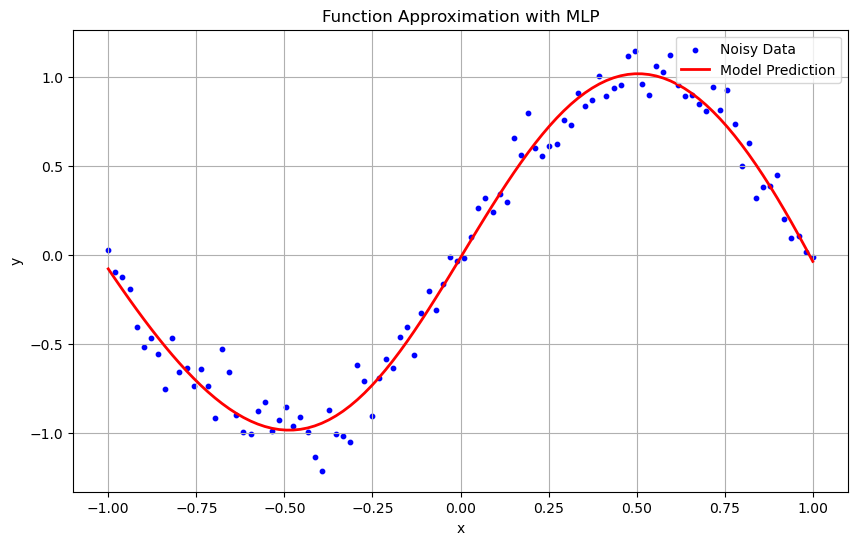

In [19]:
# --- 5. 结果可视化 ---
# 将模型设置为评估模式
model.eval()
with torch.no_grad():
    y_pred = model(x_data).cpu().numpy()
# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(x_data.cpu().numpy(), y_data.cpu().numpy(), label='Noisy Data', color='blue', s=10)
plt.plot(x_data.cpu().numpy(), y_pred, label='Model Prediction', color='red', linewidth=2)
plt.title('Function Approximation with MLP')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
